# COGS 118A - Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Nathaniel Nguyen  
- Jeff Sun
- Tin Pham
- Jose Deleon

# Abstract 
For our project we are aiming to create a model that can help estimate the price of a home based on a list of criteria. From our background research we have seen that with rapidly increasing home prices, many people are struggling to find homes that fit in their criteria and also fit their budget. We have a large dataset that contains 1000 observations of past housing prices with 18 separate variables. Some of the variables are the number of bathrooms, number of bedrooms, and zip code. This past data also contains the price for houses in these criteria allowing us too create a classifier. We also are aiming through this process to identify the variables that are most influential in the price/prediction. In order to evaluate the data we will split the data on a training/testing set where we compare our models prediction compared to the actual price of the home with the given criteria.

# Background

We performed some research on the trends of home ownership prices and also performed some research on why it is an important topic. Homeownership is a longtime stable of the American economy and Article 1 below explains “78% of Americans still associate homeownership with the ‘American Dream’”<a name="kcmcrew"></a>[<sup>[1]</sup>](#kcmnote). The financial independence of being able to claim ownership of where you live is extremely important, but despite this desire, according to Article 2 below “Since just 2000, home prices have grown 121% faster than the cost of general goods” <a name="candiloro"></a>[<sup>[2]</sup>](#candiloronote) People are struggling to purchase homes which is why this is a problem we want to tackle with a model. Utilizing a wide variety of criteria we aim to be able to predict the price of a home based on data to help people to see if homes are within their budget. Article 3 below says “Nearly 30 million Americans plan to buy a home in 2023” and our model will help these people understand the market and how specific criteria influence home prices <a name="vise"></a>[<sup>[3]</sup>](#visenote).

# Problem Statement
Ever since 2000, there has been a rapid increase in house prices in the United States. Because of this, we've seen an all-time high on the number of Americans who are unable to afford houses. However, with the amount of things simultaneously going on in the world, it is unclear what variables are causing this change. To address this issue, we intend to use a machine-learning model such as SVMs or Logistic Regression to predict the house price based on its attributes like size, number of bed/bathrooms, number of stories, and a few others. We can quantify this problem by thinking of the house price as a function of the combination of its attributes. We can also measure the severity of this problem by the relationship between house prices and the number of people who cannot afford them. This is of course a recurring problem because there has been a consistent rise in house prices every year for the past two decades which allows us to collect even more data over time.

# Data

UPDATED FROM PROPOSAL!

You should have obtained and cleaned (if necessary) data you will use for this project.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


The data can be found at the following link (https://www.kaggle.com/datasets/mohamedbakrey/housecsv). There are 999 observations with 18 separate variables. Each observation represents a house containing details like the price, # of bedrooms, number of bathrooms, number of floors, the year it was built, and more. Some critical variables could be the square feet and price which are both represented as integers in this dataset. Thankfully, the dataset is pretty clean to start off with, so there may not be many heavy changes that need to be made to the dataset.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, KFold

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


In [5]:
house_data = pd.read_csv('houses.csv')
house_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [6]:
missing_rows = house_data.isnull().any(axis=1)
rows_with_missing_data = house_data[missing_rows]
rows_with_missing_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
house_data = house_data.drop(999)
house_data.shape


(999, 18)

# Proposed Solution

We intend to use independent variables like the number of bedrooms and construction date in an effort to predict the final price of the house. This means that we should start with EDA as well as feature selection so that we can narrow down from the 17 independent variables that we’re starting off with. As for actually predicting the price we can use SVMs to accomplish this. Once we split the dataset into training and testing sets we can train the SVM on the training set such that it tries to minimize its errors. Of course, once we have a trained model we can test it on the test set and take note of its performance through tools like MSE. Then we can use tools like Grid Search to try and finetune our parameters such that we can optimize the overall model. Once, we’ve finished those steps we can finally deploy our model on unseen data and measure how well it performs. We feel this solution can work because SVMs are well suited for predicting continuous variables and it will be fed with the variables that we feel are the most important in predicting the price. This means that the model will be built upon the most quality data available to us instead of basing it on more unreliable variables. The most straightforward way we can test our model will be against the test set that we split at the beginning. This will allow us to gain a glimpse into how effective our model is against data that it wasn’t explicitly built on without requiring us to find another similar dataset.

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

One evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model in the context of housing price prediction is Mean Squared Error (MSE).
MSE calculates the average squared difference between the predicted values and the actual values. It measures the average magnitude of the error, with larger errors being penalized more heavily. 

MSE is derived by taking the average of the squared differences between the predicted and actual values:

\begin{align*}
MSE = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
\end{align*}

MSE is widely used in regression problems and provides a measure of the average prediction error. For example if given the following predictions from a model:
| Acutal Price ($y$) | Predicted Price  ($\hat{y}$)|
|---|---|
| 150000       | 155000          |
| 180000       | 175000 |
| 200000 | 195000|
|220000 | 230000|
|250000 | 240000|

$MSE = \frac{(155,000−150,000)^2 + (175,000−180,000)^2 + (195,000−200,000)^2 + (230,000−220,000)^2 + (240,000−250,000)^2}{5} = 175,000,000.$ 

This would mean that, on average, the predicted value of housing prices deviates from the the actual price by $\sqrt{175,000,000} = 175,000$ dollars. We can use this evaluation metric to compare the performance of various models where a smaller MSE would typically represent better performance.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [8]:
house_data = house_data.drop(['condition', 'grade', 'lat', 'long'], axis=1)
house_data.shape

(999, 14)

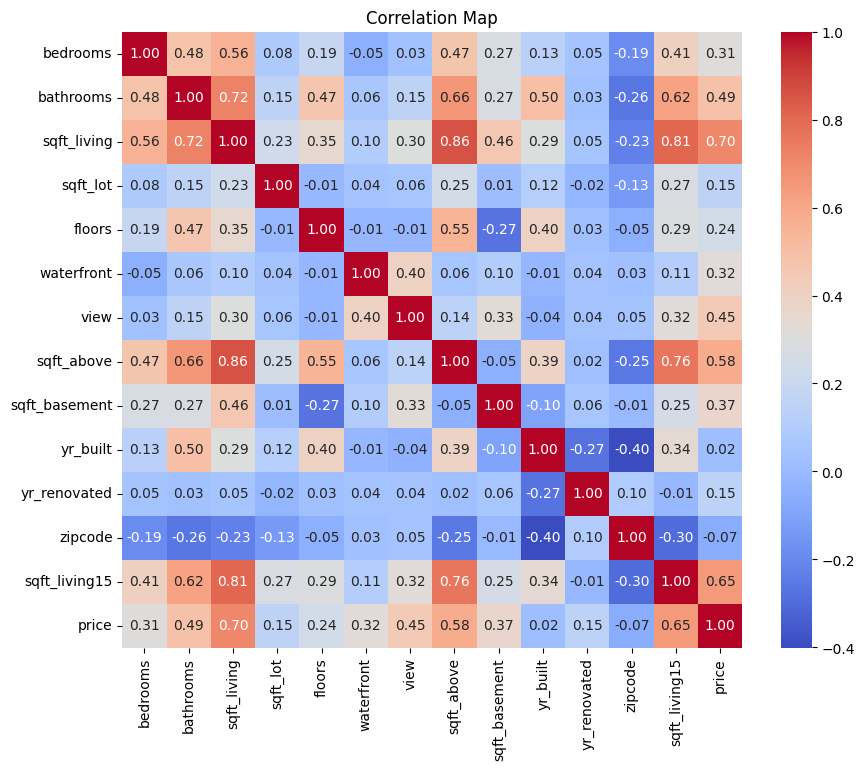

In [9]:
corr_matrix = house_data.corr()

# Generate a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Map")
plt.show()

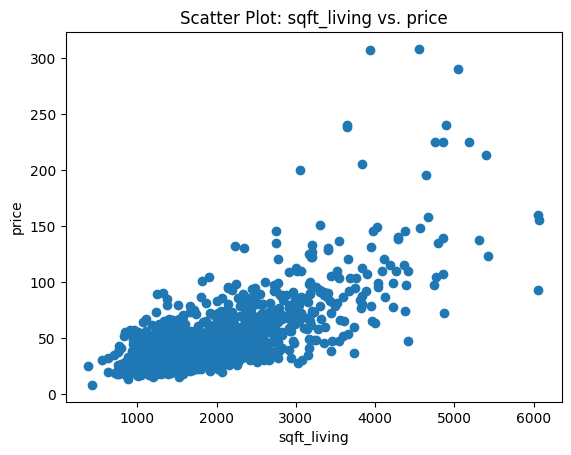

In [11]:
sqft_living = house_data['sqft_living']
price = house_data['price']

# Create a scatter plot
plt.scatter(sqft_living, price)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Scatter Plot: sqft_living vs. price')
plt.show()


In [12]:
X = house_data.drop('price', axis=1)  
y = house_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()

In [13]:
#Scale the features 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
#Make a prediction using SVM
svm = SVR(kernel='linear')
svm.fit(X_train_scaled, y_train)
svm_y_pred = svm.predict(X_test_scaled)

In [15]:
#Make a prediction using linear regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
lr_y_pred = linear_regression.predict(X_test_scaled)

In [16]:
#Make a prediction using Random Forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train_scaled, y_train)
rf_y_pred = random_forest.predict(X_test_scaled)

In [17]:
#Make a prediction using Gradient Boosting
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train_scaled, y_train)
gb_y_pred = gradient_boosting.predict(X_test_scaled)

In [18]:
sv_mse = mean_squared_error(y_test, svm_y_pred)
print("Mean Squared Error for SVM:", sv_mse)
lr_mse = mean_squared_error(y_test, lr_y_pred)
print("Mean Squared Error for Linear Regression:", lr_mse)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print("Mean Squared Error for Random Forests:", rf_mse)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print("Mean Squared Error for Gradient Boosting:", gb_mse)

Mean Squared Error for SVM: 434.36384329758863
Mean Squared Error for Linear Regression: 394.4667017679451
Mean Squared Error for Random Forests: 321.9108899283889
Mean Squared Error for Gradient Boosting: 320.03549508651986


In [19]:
X_scaled = scaler.fit_transform(X)
models = [('SVM', svm), ('Random Forest', random_forest), ('Linear Regression', linear_regression), ('Gradient Boosting', gradient_boosting)]
for name, model in models:
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    avg_mse = mse_scores.mean()
    print(f'{name}: Average MSE = {avg_mse}')

SVM: Average MSE = 441.06937305105066
Random Forest: Average MSE = 357.57832005234553
Linear Regression: Average MSE = 430.48113246934065
Gradient Boosting: Average MSE = 314.2915290991331


In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0],
}

# Perform grid search
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Best Score (MSE): 263.4111163371348


In [21]:
gb_best = GradientBoostingRegressor(**best_params)

# Fit the model to the scaled features and target variable
gb_best.fit(X_scaled, y)

GradientBoostingRegressor(n_estimators=200, subsample=0.8)

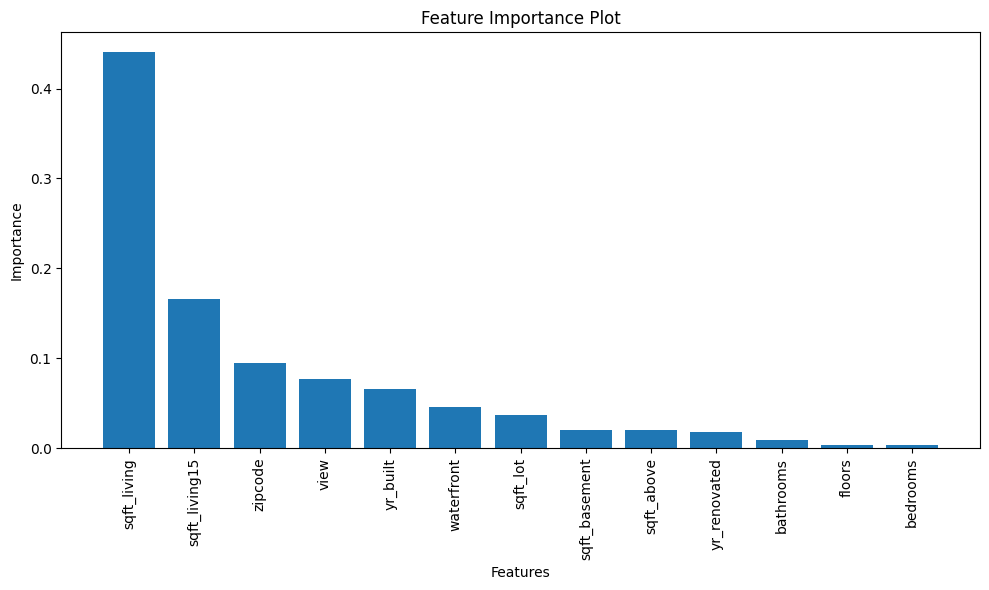

In [22]:
feature_importances = gb_best.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get the names of the features
feature_names = X.columns[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), sorted_feature_importances)
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.tight_layout()
plt.show()

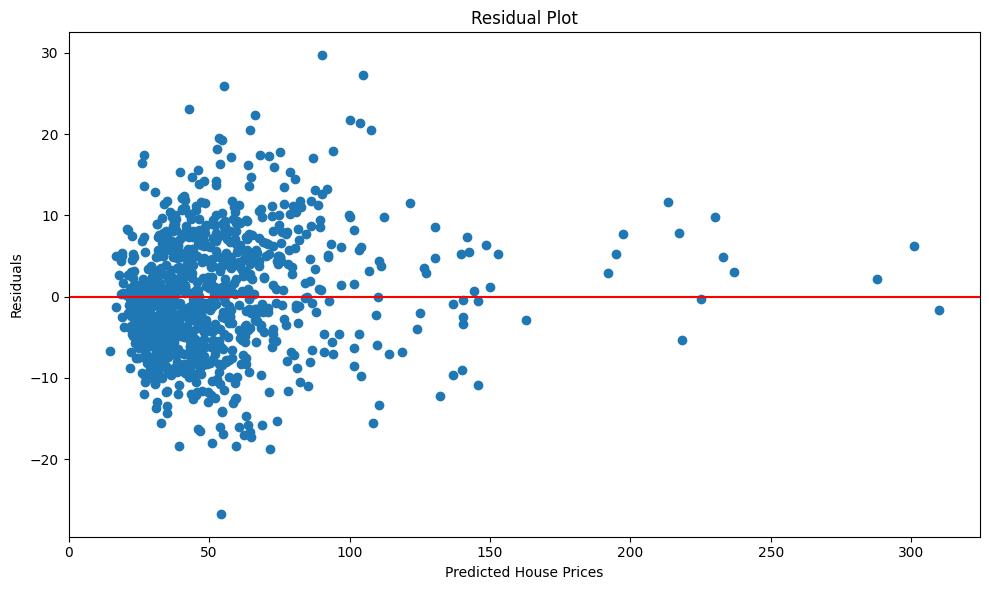

In [23]:
# Generate predictions on the training data
y_pred = gb_best.predict(X_scaled)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted House Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

In [26]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Initialize the GBR model
gbr = GradientBoostingRegressor()

# Perform nested cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=inner_cv)
best_model = None
best_score = float('inf')

for outer_train_index, outer_test_index in outer_cv.split(X):
    X_train, X_test = X_scaled[outer_train_index], X_scaled[outer_test_index]
    y_train, y_test = y[outer_train_index], y[outer_test_index]

    # Perform hyperparameter tuning within each fold of the outer loop
    grid_search.fit(X_train, y_train)

    # Get the best model and evaluate it on the validation set
    model = grid_search.best_estimator_
    score = mean_squared_error(y_test, model.predict(X_test))

    # Check if this model performs better than the previous best
    if score < best_score:
        best_model = model
        best_score = score

# Train the final model on the entire dataset
best_model.fit(X_scaled, y)

# Evaluate the final model on the test set
final_score = mean_squared_error(y_test, best_model.predict(X_test))

In [27]:
final_score

35.34896720926785

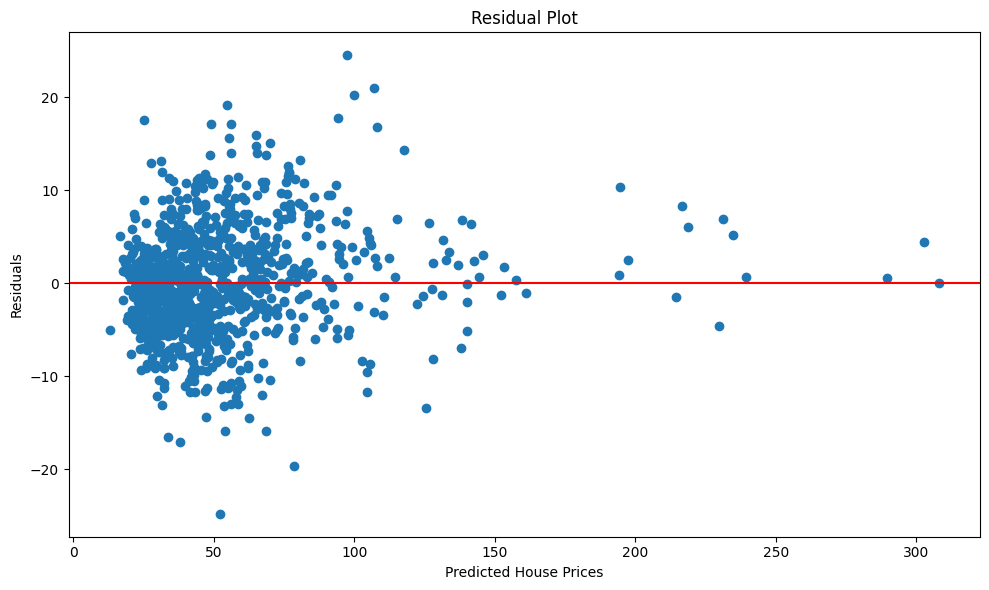

In [29]:
# Get the predictions from the best model
y_pred = best_model.predict(X_scaled)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted House Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
test_score = mean_squared_error(y_test, y_pred_test)
test_score

235.5819355684494

# Ethics & Privacy

Ethical concerns:
1. Are people's privacy being invaded during data collection
2. How secure is the data of other people's properties
3. Are people's identity at stake
4. Is our dataset biased
5. Is our model fair across all groups of datapoints

Possible solutions:
1. The data collectors are required to inform the residents about the data being collected and explicitly ask them for consent on whether the data can be collected or not
2. We implement a system that erases all the data of the house when it is no longer need
3. Personally identifiable will be minimized or not collected at all since they're not really needed in this case
4. For our dataset, we can do a background check to see who provided and collected the data and if they're someone with credibility
5. We can use different groups of data samples when testing our model so that we can average across all groups making it a less biased model


# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* Communication: respond in no more than 6 hours, expected to be reachable via iMessage or discord
* Be able to devote enough time to meet deadlines within the appropriate time constraint
* Atleast once a week agreement to meet
* Be flexible to other ideas and changes
* For conflict resolution: Try to avoid public confrontations and handle conflicts in private, otherwise group resolution will be necessary
* Any further unresolved conflicts will be mentioned to the TA/Professor

# Project Timeline Proposal

Replace this with something meaningful that is appropriate for your needs. It doesn't have to be something that fits this format.  It doesn't have to be set in stone... "no battle plan survives contact with the enemy". But you need a battle plan nonetheless, and you need to keep it updated so you understand what you are trying to accomplish, who's responsible for what, and what the expected due dates are for each item.

MEET EVERY FRIDAY

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/12  |  4 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; begin background research; Work on Proposal | 
| 5/17  | 4 PM  | Brainstorm topics/questions | Discuss ideal datasets; decide on final project topic; finalize proposal | 
| 5/19  |  4 PM |  Import & Wrangle Data | Discuss model selection; EDA; feature selection | 
| 5/26  | 4 PM  |  Train various models | Discuss model evaluation/various evaluation metrics   |
| 6/2  | 4 PM  | Compute evaluation metrics | Discuss finalizing model selection and fine-tuning   |
| 6/9  | 4 PM  | Finalize Model | Finish model evaluation; discuss analysis/takeaways |
| 6/11  | 4 PM  | Complete final touches| Discuss/edit full project |


# Footnotes
<a name="kcmcrew"></a>1.[^](#kcm): KCM. (8 Nov 2022) The Majority of Americans Still View Homeownership as the American Dream. *Keeping Current Matters*. https://www.keepingcurrentmatters.com/2022/11/08/the-majority-of-americans-still-view-homeownership-as-the-american-dream/#:~:text=Over%20time%2C%20owning%20a%20home,homeownership%20with%20the%20'American%20dream <br>
<a name="candiloro"></a>2.[^](#candiloro): Candiloro, T. (28 Mar 2023) Home Prices vs. Inflation: Why Millennials Can't Afford Homes (2022 Data) *Anytime Estimate*. https://anytimeestimate.com/research/housing-prices-vs-inflation/#:~:text=Even%20since%20just%202000%2C%20home,exceeded%20overall%20inflation%20by%20168%25 <br>
<a name="vise"></a>3.[^](#vise): Visé de, D. (24 Jan 2023) Survey finds Americans wildly misinformed on housing market *The Hill*. https://thehill.com/business/3827057-survey-finds-americans-wildly-misinformed-on-housing-market/#:~:text=Nearly%2030%20million%20Americans%20plan,existing%20homes%20sold%20in%202021 <br>